In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from data_cleaning import remove_stopwords, comments_to_words, lemmatization, professor_tags
from sklearn.feature_extraction.text import CountVectorizer
import swifter
import pandas as pd
import numpy as np
import gensim
import pickle
import re
import collections
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords

#### Exploratory Data Analysis

In [3]:
datafile = "RateMyProfessor_Sample_data.csv"
df = pd.read_csv(datafile)

In [4]:
f"Total rows : {len(df)}"

'Total rows : 20000'

In [5]:
df.describe()

,year_since_first_review,star_rating,diff_index,num_student,student_star,student_difficult,help_useful,help_not_useful,word_comment,asian,...,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline
count,20000.00000,20000.000000,20000.000000,20000.000000,19995.000000,19995.000000,20000.000000,20000.000000,19993.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,7.82350,3.643825,2.956345,33.266850,3.616879,2.988147,0.293850,0.185450,36.961086,0.022525,...,0.201350,0.134250,0.217750,0.116150,0.102800,0.080700,0.098350,0.076750,0.067900,0.020100
std,3.91505,0.836048,0.776795,31.321627,1.457886,1.308825,0.860139,0.720614,21.303202,0.026088,...,0.401019,0.340929,0.412727,0.320413,0.303705,0.272381,0.297795,0.266201,0.251581,0.140346
min,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000684,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.00000,3.000000,2.400000,15.000000,2.500000,2.000000,0.000000,0.000000,18.000000,0.007562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.00000,3.700000,3.000000,24.000000,4.000000,3.000000,0.000000,0.000000,38.000000,0.016080,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.00000,4.300000,3.500000,41.000000,5.000000,4.000000,0.000000,0.000000,57.000000,0.031384,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.00000,5.000000,5.000000,321.000000,5.000000,5.000000,9.000000,9.000000,142.000000,0.388363,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.head()

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
3,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
4,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0


In [7]:
df.columns

Index(['professor_name', 'school_name', 'department_name', 'local_name',
       'state_name', 'year_since_first_review', 'star_rating', 'take_again',
       'diff_index', 'tag_professor', 'num_student', 'post_date',
       'name_onlines', 'name_not_onlines', 'student_star', 'student_difficult',
       'attence', 'for_credits', 'would_take_agains', 'grades', 'help_useful',
       'help_not_useful', 'comments', 'word_comment', 'gender', 'race',
       'asian', 'hispanic', 'nh_black', 'nh_white', 'gives_good_feedback',
       'caring', 'respected', 'participation_matters',
       'clear_grading_criteria', 'skip_class', 'amazing_lectures',
       'inspirational', 'tough_grader', 'hilarious', 'get_ready_to_read',
       'lots_of_homework', 'accessible_outside_class', 'lecture_heavy',
       'extra_credit', 'graded_by_few_things', 'group_projects', 'test_heavy',
       'so_many_papers', 'beware_of_pop_quizzes', 'IsCourseOnline'],
      dtype='object')

In [8]:
df.department_name = df['department_name'].apply(lambda s: ' '.join(s.split()[:-1])) # shortening dept name

In [9]:
schools = df.school_name.unique()
depts = df.department_name.unique()


### Total Schools

In [10]:
df_schools = df.groupby('school_name')['school_name'].count()

df_schools

school_name
Abilene Christian University        20
Acadia University                   19
Albright College                    19
Alma College                         4
Alvernia University                 18
                                  ... 
Wright State University             39
Yale University                      2
York College of Pennsylvania         8
York University (all campuses)     220
York University- Glendon campus     20
Name: school_name, Length: 554, dtype: int64

In [11]:
df_schools.idxmin(), df_schools.min()

('University of Massachusetts', 1)

In [12]:
df_schools.idxmax(), df_schools.max()

('Volunteer State Community College', 860)

### Total Departments

In [13]:
df_depts = df.groupby('department_name')['department_name'].count()

df_depts

department_name
ASL & Deaf Studies       18
Accounting              264
Accounting & Finance     20
African Studies          19
Agriculture               6
                       ... 
Theater                 218
Theology                165
Visual Arts              18
Women\'s Studies         96
Writing                 115
Name: department_name, Length: 101, dtype: int64

In [14]:
df_depts.idxmin(), df_depts.min()

('Comparative Literature', 1)

In [15]:
df_depts.idxmax(), df_schools.max()

('English', 860)

### Total Professors

In [16]:
df_profs = df.groupby('professor_name')['professor_name'].count()

df_profs

professor_name
A  Osaitile          20
A  Ruttenbur          5
A J  Senchack        10
Aaron  Fogel         20
Aaron  Kozbelt       20
                     ..
Ying  Wang           20
Younghe  Kim Park    20
Yousif  Shamoo        6
Zeno  Swijtink       20
Zeynep  Tenger       16
Name: professor_name, Length: 1413, dtype: int64

In [17]:
df_profs.idxmax(), df_profs.max()

('Alan  Bell', 38)

In [18]:
df_profs.idxmin(), df_profs.min()

('Baron  Stewart', 1)

In [19]:
custom_words = ['professor', 'class', 'teacher', 'question']

sentences = df['comments'].values.tolist()
data_words = list(comments_to_words(sentences))
data_nostop_words = remove_stopwords(data_words, custom_words)
lemmatized_data = lemmatization(data_nostop_words, allowed_word_types = ['NOUN', 'ADJ', 'VERB', 'ADV'])

In [20]:
# Lower case + Tokenization only (for word clouds)

clean_reviews = []
for sen in data_words:
        clean_sen = ' '.join(word for word in sen)
        clean_reviews.append(clean_sen)
len(clean_reviews)

df['clean_reviews'] = clean_reviews

In [21]:
df['clean_reviews']

0        this class is hard but its two in one gen ed k...
1        definitely going to choose prof looney class a...
2        overall enjoyed this class because the assignm...
3        yes it possible to get an but you ll definitel...
4        professor looney has great knowledge in astron...
                               ...                        
19995              great sense of humor love parasites now
19996    he is really nice guy and is really funny howe...
19997    his parasitology class is lot of work but he m...
19998    he is way too much work for credit class shegn...
19999    extremely easy lab teacher quizzes are little ...
Name: clean_reviews, Length: 20000, dtype: object

In [22]:
df.comments[0]

'This class is hard, but its a two-in-one gen-ed knockout, and the content is very stimulating. Unlike most classes, you have to actually participate to pass. Sections are easy and offer extra credit every week. Very funny dude. Not much more I can say.'

In [23]:
df.clean_reviews[0]

'this class is hard but its two in one gen ed knockout and the content is very stimulating unlike most classes you have to actually participate to pass sections are easy and offer extra credit every week very funny dude not much more can say'

In [24]:
df.comments

0        This class is hard, but its a two-in-one gen-e...
1        Definitely going to choose Prof. Looney\'s cla...
2        I overall enjoyed this class because the assig...
3        Yes, it\'s possible to get an A but you\'ll de...
4        Professor Looney has great knowledge in Astron...
                               ...                        
19995     Great sense of humor!!!! Love parasites now!!!!!
19996    he is a really nice guy and is really funny..h...
19997    His parasitology class is a lot of work but he...
19998    He is WAY too much work for a 1 credit class. ...
19999    Extremely easy lab teacher, quizzes are a litt...
Name: comments, Length: 20000, dtype: object

In [25]:
df.clean_reviews

0        this class is hard but its two in one gen ed k...
1        definitely going to choose prof looney class a...
2        overall enjoyed this class because the assignm...
3        yes it possible to get an but you ll definitel...
4        professor looney has great knowledge in astron...
                               ...                        
19995              great sense of humor love parasites now
19996    he is really nice guy and is really funny howe...
19997    his parasitology class is lot of work but he m...
19998    he is way too much work for credit class shegn...
19999    extremely easy lab teacher quizzes are little ...
Name: clean_reviews, Length: 20000, dtype: object

In [26]:
df.head()

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline,clean_reviews
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,1,0,0,0,0,this class is hard but its two in one gen ed k...
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,1,0,0,0,0,definitely going to choose prof looney class a...
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,1,0,0,0,0,overall enjoyed this class because the assignm...
3,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,1,0,0,0,0,yes it possible to get an but you ll definitel...
4,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,1,0,0,0,0,professor looney has great knowledge in astron...


In [27]:
# df.to_csv('Clean_data.csv')

In [28]:
# professors = df['professor_name'].values.tolist()
# df.tag_professor = df.tag_professor.fillna('')
# tags = df['tag_professor'].values.tolist()
# prof_tags_dict = collections.defaultdict(list)
# for i in range(len(tags)):  
#     tgs = re.sub('\(\d\)',':', tags[i])
#     clean_tags = [x.strip() for x in tgs.split(':') if x!='']
#     freqs = re.findall('(\d)', tags[i])
#     tag_freqs = list(zip(clean_tags, freqs))
#     prof_tags_dict[professors[i]] = tag_freqs
        
    
# with open('prof_tags_dict.pickle', 'wb') as handle:
#     pickle.dump(prof_tags_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('prof_tags_dict.pickle', 'rb') as handle:
#     b = pickle.load(handle)

#### WordCloud


In [29]:
dff = df[df['clean_reviews'] != 'comments']  # No comments ~ comments after removing stop words
dff = df[df['clean_reviews'] != 'no comments']  # No comments ~ comments after removing stop words

# dff

In [30]:
# wordcloud function
def show_wordcloud(data, title = None): # data - list of strings
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 75,
        max_font_size = 40, 
        scale = 3,
        random_state = 42,
        collocation_threshold = 5 
    # ).generate(str(data))
    ).generate(' '.join(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# show_wordcloud(list(dff['clean_reviews']))

In [31]:
# wordcloud = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', 
#                       colormap='Pastel1', max_words = 75, collocations=False, normalize_plurals=False).generate(tweet_string)

In [32]:
def f(x):
    d = {}
    d['star_rating'] = x['star_rating'].max()
    d['reviews_concat'] = ' '.join(x['clean_reviews'])
    return pd.Series(d, index=['star_rating', 'reviews_concat'])


dfprofs = dff.groupby('professor_name').apply(f)

In [33]:
dfprofs

,star_rating,reviews_concat
professor_name,,
A Osaitile,3.7,loved professor osaitile he was very sweet and...
A Ruttenbur,3.4,ms ruttenbur was extremely helpful in class sh...
A J Senchack,3.2,anybody who does not think prof senchack is on...
Aaron Fogel,4.0,worst professor have ever had lectures jump fr...
Aaron Kozbelt,4.7,he such gen he genuinely cares that you unders...
...,...,...
Ying Wang,4.9,wang laoshi is honestly the best am so glad to...
Younghe Kim Park,4.0,went through lectures too fast funny teacher t...
Yousif Shamoo,3.9,in terms of research he is very cutthroat he w...


In [34]:
dftopProfs = dfprofs.sort_values('star_rating', ascending=False)[0:20]

dftopProfs

,star_rating,reviews_concat
professor_name,,
David Keswick,5.0,nice guy and laid back all tests are take home...
K McFadden,5.0,great great that all can say hate math and did...
Kathy Brooks,5.0,awesome teacher very good teacher good sense o...
Charlene Dalrymple,5.0,she is an awesome she is so dedicated to music...
Carol Topping,5.0,professor top is amazing she gives lectures th...
John Starr,5.0,best class ve ever taken he now teaching at ya...
Hashim Gibrill,5.0,dr gibrill is so down to earth he funny and ve...
Sylvia Marks,5.0,one of the best professors ever had genuinely ...
Ilya Vinitskiy,5.0,he was very good the class material was intere...


In [35]:
dflowProfs = dfprofs.sort_values('star_rating')[0:20]

dflowProfs

,star_rating,reviews_concat
professor_name,,
Jerome Cooper,1.0,avoid this professor did not grade according t...
Fred Williams,1.0,do not take any class this man teaches he is h...
J Harrison,1.0,took her online her test are really hard way h...
Pat Cyrgalis,1.0,gives as little information as possible and if...
C Jackson,1.2,mr jackson was not helpful at all and was very...
Brenda Nordenstam,1.2,totally boring you have to go to class to get ...
Cindy Williams,1.2,this professor is in her st year and treats he...
Roger Magyar,1.2,this guy is tough first of all everything he s...
Matthew Elam,1.2,the class was so boring he is my worst teacher...


### Word cloud for Top 5 rated Professors

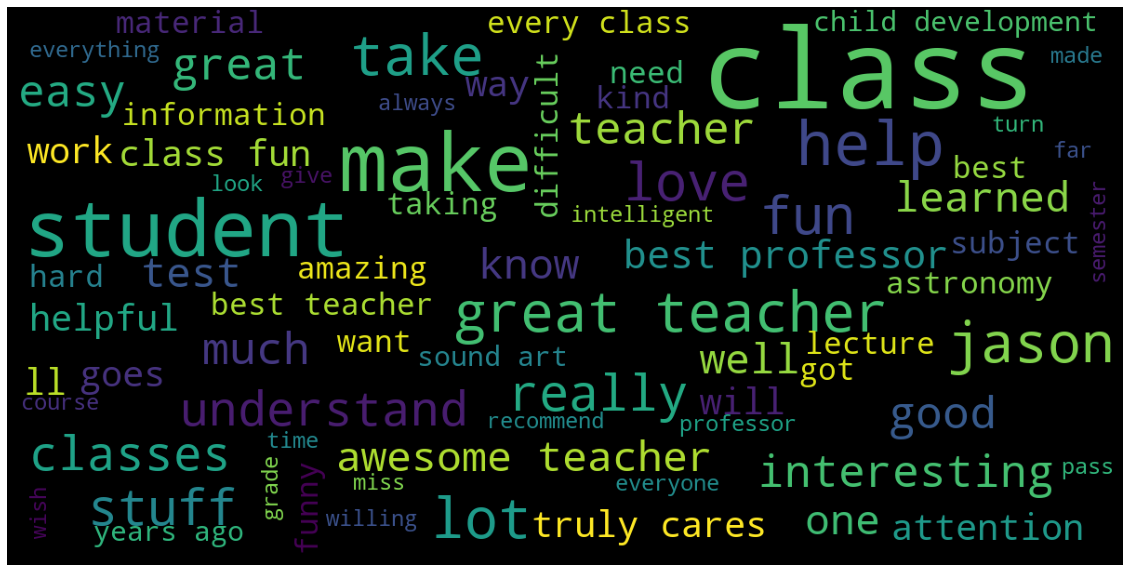

In [36]:
show_wordcloud(list(dftopProfs['reviews_concat']))

### Word cloud for Bottom 5 rated Professors

In [37]:
# list(dflowProfs['reviews_concat'])

 Helpful ~ "Not Helpful / Isn't very helpful "

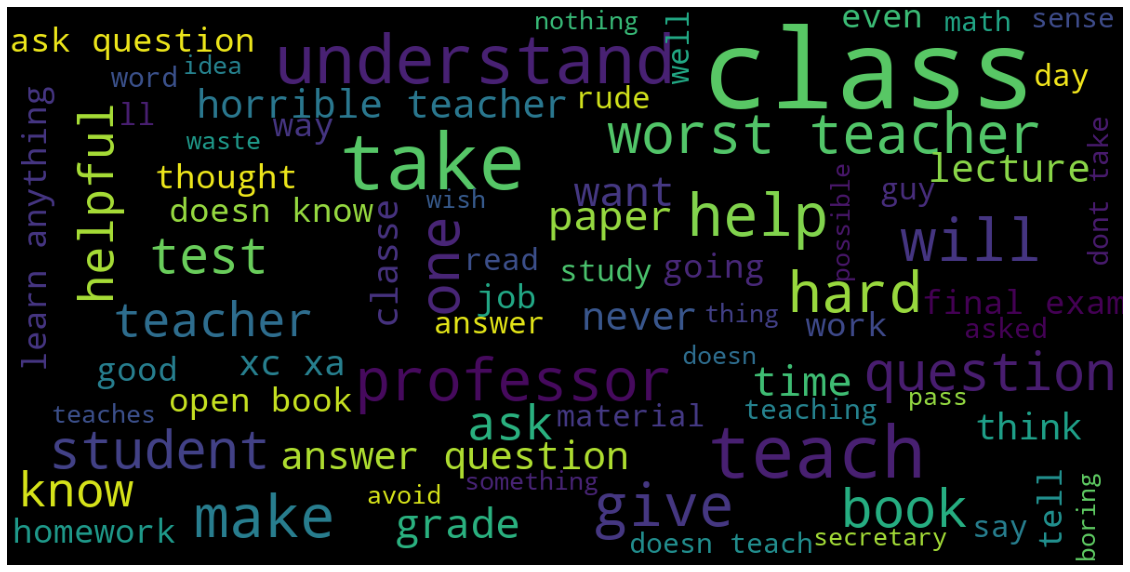

In [38]:
show_wordcloud(list(dflowProfs['reviews_concat']))

### Bigrams & Trigrams word cloud

In [39]:
from nltk.util import ngrams
def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []
    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
            
    except(RuntimeError):
        pass
        
    return ' '.join(returnVal).strip()

In [40]:
dflowProfs["bigram_text"] = dflowProfs["reviews_concat"].swifter.apply(get_ngrams, n=2)
dflowProfs["trigram_text"] = dflowProfs["reviews_concat"].swifter.apply(get_ngrams, n=3)

dftopProfs["bigram_text"] = dftopProfs["reviews_concat"].swifter.apply(get_ngrams, n=2)
dftopProfs["trigram_text"] = dftopProfs["reviews_concat"].swifter.apply(get_ngrams, n=3)


Pandas Apply:   0%|          | 0/20 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20 [00:00<?, ?it/s]

In [41]:
# dflowProfs

In [42]:
# dftopProfs

In [43]:
# show_wordcloud(list(dflowProfs["bigram_text"]))

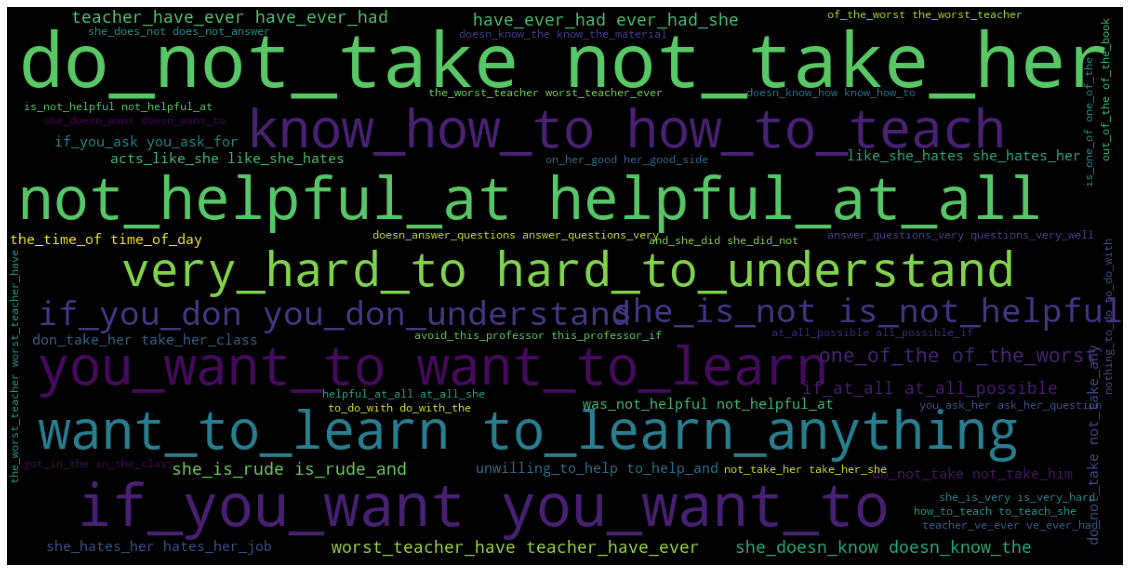

In [44]:
show_wordcloud(list(dflowProfs["trigram_text"]))

In [45]:
# show_wordcloud(list(dftopProfs["bigram_text"]))

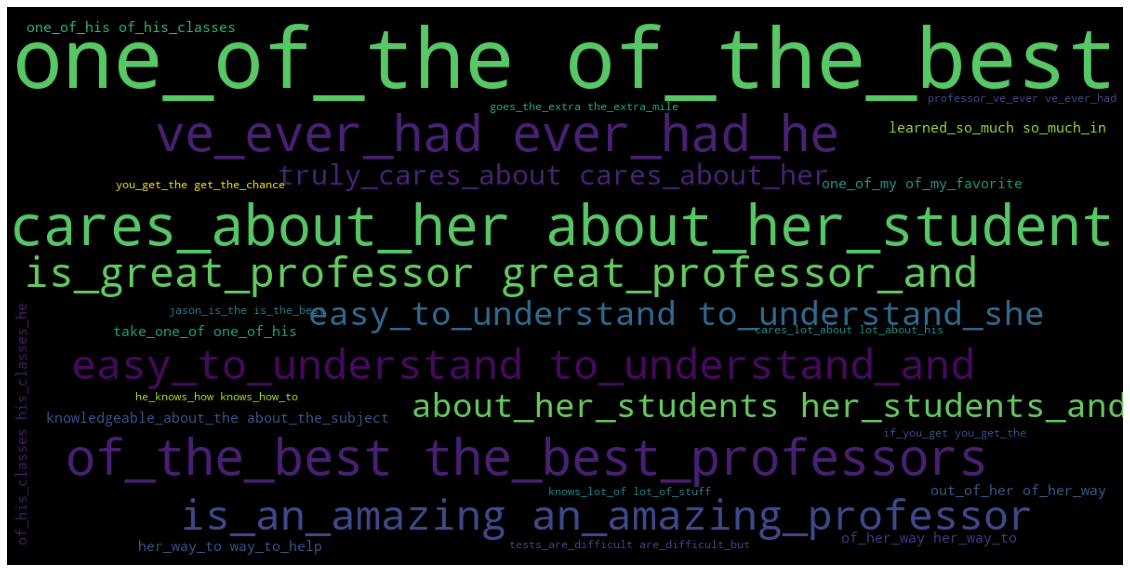

In [46]:
show_wordcloud(list(dftopProfs["trigram_text"]))

## Sentiment Analysis

#### Preprocessing

In [47]:
## Lower case / Tokenization / Stop Words Removal / Lemmatization
      
superclean_reviews = [ ' '.join(word for word in sen) for sen in lemmatized_data]
len(superclean_reviews)

df['superclean_reviews'] = superclean_reviews

In [48]:
lemmatized_data

[['hard',
  'knockout',
  'content',
  'stimulate',
  'class',
  'actually',
  'participate',
  'pass',
  'section',
  'easy',
  'offer',
  'extra',
  'credit',
  'week',
  'funny',
  'dude',
  'much',
  'say'],
 ['definitely',
  'go',
  'choose',
  'prof',
  'interesting',
  'easy',
  'bring',
  'note',
  'exam',
  'need',
  'remember',
  'lot',
  'lot',
  'bonus',
  'point',
  'available',
  'observatory',
  'session',
  'awesome'],
 ['overall',
  'enjoy',
  'assignment',
  'straightforward',
  'interesting',
  'enjoy',
  'video',
  'project',
  'feel',
  'group',
  'care',
  'enough',
  'help'],
 ['possible',
  'get',
  'definitely',
  'work',
  'content',
  'pretty',
  'interesting',
  'tog',
  'get',
  'super',
  'organize',
  'multiple',
  'thing',
  'due',
  'week',
  'ton',
  'lecture',
  'go',
  'possible',
  'avoid',
  'week',
  'course',
  'definitely',
  'always',
  'somethingto'],
 ['great',
  'knowledge',
  'astronomy',
  'explain',
  'super',
  'easy',
  'way',
  'teach'

In [49]:
df['superclean_reviews']

0        hard knockout content stimulate class actually...
1        definitely go choose prof interesting easy bri...
2        overall enjoy assignment straightforward inter...
3        possible get definitely work content pretty in...
4        great knowledge astronomy explain super easy w...
                               ...                        
19995                      great sense humor love parasite
19996    really nice guy really funny however well usua...
19997    parasitology lot work make extremely interesti...
19998    way much work credit shegnoski nice helpful mu...
19999    extremely easy lab quiz little difficult s alw...
Name: superclean_reviews, Length: 20000, dtype: object

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

df["sentiments"] = df["comments"].apply(lambda review: sid.polarity_scores(str(review)))


In [51]:
df.comments

0        This class is hard, but its a two-in-one gen-e...
1        Definitely going to choose Prof. Looney\'s cla...
2        I overall enjoyed this class because the assig...
3        Yes, it\'s possible to get an A but you\'ll de...
4        Professor Looney has great knowledge in Astron...
                               ...                        
19995     Great sense of humor!!!! Love parasites now!!!!!
19996    he is a really nice guy and is really funny..h...
19997    His parasitology class is a lot of work but he...
19998    He is WAY too much work for a 1 credit class. ...
19999    Extremely easy lab teacher, quizzes are a litt...
Name: comments, Length: 20000, dtype: object

In [52]:
df["sentiments"]

0        {'neg': 0.022, 'neu': 0.685, 'pos': 0.293, 'co...
1        {'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou...
2        {'neg': 0.053, 'neu': 0.531, 'pos': 0.415, 'co...
3        {'neg': 0.035, 'neu': 0.684, 'pos': 0.281, 'co...
4        {'neg': 0.026, 'neu': 0.549, 'pos': 0.426, 'co...
                               ...                        
19995    {'neg': 0.0, 'neu': 0.346, 'pos': 0.654, 'comp...
19996    {'neg': 0.095, 'neu': 0.823, 'pos': 0.082, 'co...
19997    {'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'comp...
19998    {'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'comp...
19999    {'neg': 0.136, 'neu': 0.614, 'pos': 0.25, 'com...
Name: sentiments, Length: 20000, dtype: object

In [53]:
'''
Neg | Neu | Pos : Actual sentiment scores
Compound : Degree of the sentiment ~ [-1] extremely negative & [+1] extremely positive
'''
df['sentiments'].iloc[0]

{'neg': 0.022, 'neu': 0.685, 'pos': 0.293, 'compound': 0.9488}

In [54]:
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

In [55]:
df

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline,clean_reviews,superclean_reviews,neg,neu,pos,compound
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,this class is hard but its two in one gen ed k...,hard knockout content stimulate class actually...,0.022,0.685,0.293,0.9488
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,definitely going to choose prof looney class a...,definitely go choose prof interesting easy bri...,0.000,0.660,0.340,0.9476
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,overall enjoyed this class because the assignm...,overall enjoy assignment straightforward inter...,0.053,0.531,0.415,0.9325
3,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,yes it possible to get an but you ll definitel...,possible get definitely work content pretty in...,0.035,0.684,0.281,0.9655
4,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,professor looney has great knowledge in astron...,great knowledge astronomy explain super easy w...,0.026,0.549,0.426,0.9870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Dennis Richardson,Quinnipiac University,Biology,Hamden,CT,15,4.0,NaN,3.5,BEWARE OF POP QUIZZES (4) Amazing lectures (3...,...,0,0,1,0,great sense of humor love parasites now,great sense humor love parasite,0.000,0.346,0.654,0.8877
19996,Dennis Richardson,Quinnipiac University,Biology,Hamden,CT,15,4.0,NaN,3.5,BEWARE OF POP QUIZZES (4) Amazing lectures (3...,...,0,0,1,0,he is really nice guy and is really funny howe...,really nice guy really funny however well usua...,0.095,0.823,0.082,-0.1962
19997,Dennis Richardson,Quinnipiac University,Biology,Hamden,CT,15,4.0,NaN,3.5,BEWARE OF POP QUIZZES (4) Amazing lectures (3...,...,0,0,1,0,his parasitology class is lot of work but he m...,parasitology lot work make extremely interesti...,0.000,0.572,0.428,0.9378
19998,Dennis Richardson,Quinnipiac University,Biology,Hamden,CT,15,4.0,NaN,3.5,BEWARE OF POP QUIZZES (4) Amazing lectures (3...,...,0,0,1,0,he is way too much work for credit class shegn...,way much work credit shegnoski nice helpful mu...,0.000,0.522,0.478,0.8750


### Correlation b/w Student Star Rating & Sentiment Score

In [56]:
# Classify as Bad or Good Review based on Student Star Rating ~ Range(0,5)
df["is_bad_review"] = df["student_star"].apply(lambda x: 1 if x < 3 else 0)

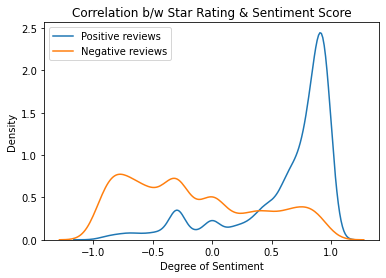

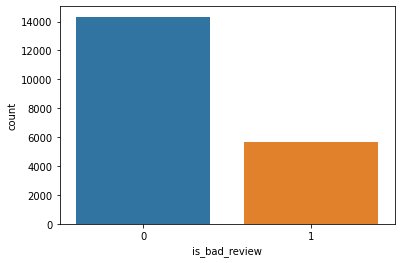

In [57]:
# Plot sentiment distribution for positive and negative reviews ~ Correlation between Star Rating & Sentiment Score
for x in [0, 1]:
    subset = df[df['is_bad_review'] == x]
    # Draw the density plot
    if x == 0: label = "Positive reviews"
    else: label = "Negative reviews"
    sns.distplot(subset['compound'], hist = False, label = label)
    
    
plt.legend()
plt.xlabel('Degree of Sentiment')
plt.title("Correlation b/w Star Rating & Sentiment Score")
plt.show()

sns.countplot(x ='is_bad_review', data = df)
plt.show()


### Correlation b/w Student Difficulty Rating & Sentiment Score

In [58]:
# Classify as Difficult or Not Difficult based on Student Difficult Score ~ Range(0,5) ~ Mean 2.99
df["is_difficult"] = df["student_difficult"].apply(lambda x: 1 if x > 3 else 0)

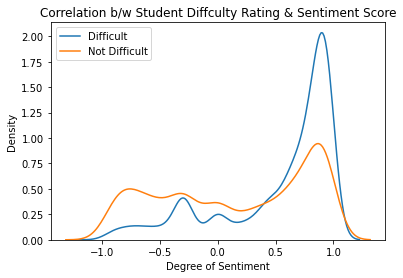

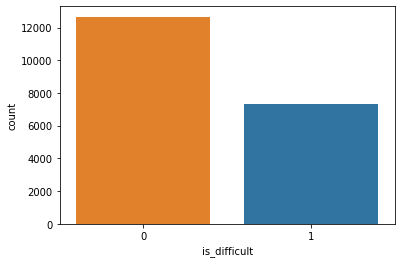

In [59]:
# Plot sentiment distribution for positive and negative reviews ~ Correlation between Star Rating & Sentiment Score
for x in [0, 1]:
    subset = df[df['is_difficult'] == x]
    # Draw the density plot
    if x == 0: label = "Difficult"
    else: label = "Not Difficult"
    sns.distplot(subset['compound'], hist = False, label = label)
    
plt.legend()
plt.xlabel('Degree of Sentiment')
plt.title("Correlation b/w Student Diffculty Rating & Sentiment Score")
plt.show()

sns.countplot(x = 'is_difficult', data = df, palette=["#ff7f0e", "#1f77b4"])
plt.show()


### Overall Sentiment

Zoom in on any dept ? Or any college ?

In [60]:
def get_sentiment(x):

    if x['compound']>=0.05: return 'Positive'
    elif x['compound']<=-0.05: return 'Negative'
    else: return 'Neutral'
    
#     mapp = {0:'Negative', 1:'Neutral', 2:'Positive'}
#     i = np.argmax([x['neg'], x['neu'], x['pos']]) 

df['Sentiment'] = df.apply(get_sentiment, axis=1)

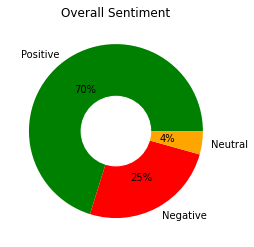

In [61]:
# create data
names = ['Positive', 'Negative', 'Neutral']

szPositive = len(df[df['Sentiment']=='Positive'])
szNegative = len(df[df['Sentiment']=='Negative'])
szNeutral = len(df[df['Sentiment']=='Neutral'])

size = [szPositive,szNegative,szNeutral]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.4, color='white')

# Give color names
plt.pie(size, labels = names, autopct='%1.0f%%', colors=['green','red','orange'])

p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.title('Overall Sentiment')
plt.show()

### Sentiment Per Department  

101 departments - How to narrow it down?

In [82]:
def func(x):
    d = {}
    pos = len(x[x['Sentiment']=='Positive'])
    neu = len(x[x['Sentiment']=='Neutral'])
    neg = len(x[x['Sentiment']=='Negative'])
    
    total = pos+neu+neg
    d['#Positive'] = pos/total * 100
    d['#Neutral'] = neu/total * 100
    d['#Negative'] = neg/total * 100
    
    return pd.Series(d, index=['#Positive', '#Neutral', '#Negative'])
    
df_dept_sent = df.groupby('department_name').apply(func)

In [83]:
df_dept_sent

,#Positive,#Neutral,#Negative
department_name,,,
ASL & Deaf Studies,77.777778,0.000000,22.222222
Accounting,65.909091,4.545455,29.545455
Accounting & Finance,95.000000,0.000000,5.000000
African Studies,36.842105,5.263158,57.894737
Agriculture,83.333333,0.000000,16.666667
...,...,...,...
Theater,70.642202,6.422018,22.935780
Theology,74.545455,2.424242,23.030303
Visual Arts,83.333333,0.000000,16.666667


Text(0.5, 1.0, 'Sentiment Across Departments')

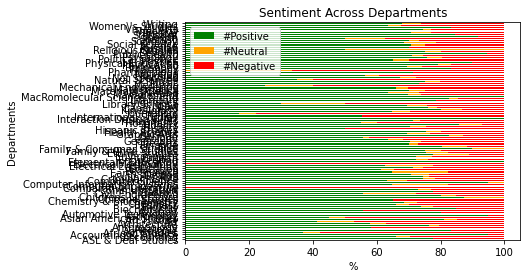

In [84]:
df_dept_sent.plot(kind='barh', stacked=True, color=['green', 'orange', 'red'])
 
plt.legend
plt.xlabel('%')
plt.ylabel('Departments')
plt.title('Sentiment Across Departments')

### Sentiment Across STEM

Choosing:
1. Computer Science department
2. Physics department
3. Mathematics department
4. Chemistry department
5. Biology department
6. Geography department
7. Electrical Engineering department

In [85]:
stem = ['Computer Science', 'Physics', 'Mathematics', 'Chemistry', 'Biology', 'Geography', 'Electrical Engineering']

df_dept_sent_stem = df_dept_sent.loc[stem]


df_dept_sent_stem


,#Positive,#Neutral,#Negative
department_name,,,
Computer Science,63.302752,6.269113,30.428135
Physics,65.116279,4.983389,29.900332
Mathematics,66.027088,3.668172,30.304740
Chemistry,68.664384,3.938356,27.397260
Biology,73.933210,3.617811,22.448980
Geography,63.662791,4.651163,31.686047
Electrical Engineering,62.500000,15.000000,22.500000


Text(0.5, 1.0, 'Sentiment Across Departments')

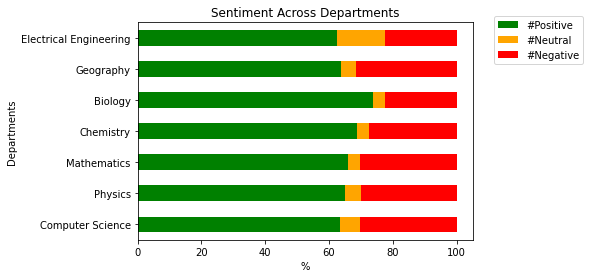

In [89]:
df_dept_sent_stem.plot(kind='barh', stacked=True, color=['green', 'orange', 'red'])

plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.xlabel('%')
plt.ylabel('Departments')
plt.title('Sentiment Across Departments')